## THE SPARKS FOUNDATION

## Data Science and Business Analysis Internship---GRIP September 2023

### Author: Tahleel Rashid Shah

### Task 2: Prediction using Unsupervised Machine Learning

### Problem Statement: From the given Iris dataset, predict the optimum number of clusters and represent it visually.

### Dataset: https://bit.ly/3kXTdox

## Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
%matplotlib inline
from sklearn import datasets

### Loading dataset from the Sklearn library as it is in-built in Sklearn library

In [4]:
# Load the Iris dataset
iris = datasets.load_iris()

# Create a DataFrame from the Iris data, including species labels
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Create a DataFrame from the Iris data, including species labels
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Display the first 10 rows of the DataFrame
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [9]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [11]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [21]:
#check for duplicate value
df.duplicated().sum()

1

In [23]:
#drop the duplicate value
df.drop_duplicates(inplace = True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
#now checking again shape of our dataset
df.shape

(149, 4)

### Determine the number of clusters:



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


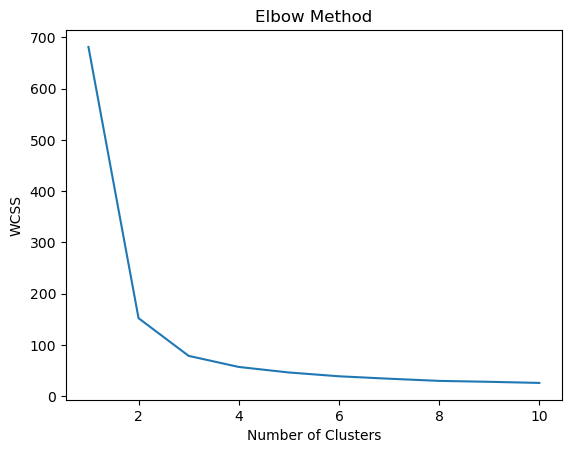

In [15]:
from sklearn.cluster import KMeans
x = df.iloc[:, :-1].values
WCSS = [] # within-cluster sum of squares

for i in range(1, 11):
    model = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(x)
    WCSS.append(model.inertia_)
plt.plot(range(1,11), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### From the above graph we can conclude that the number of clusters is 3

## Apply k-means to the dataset / Creating the kmeans classifier

In [16]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

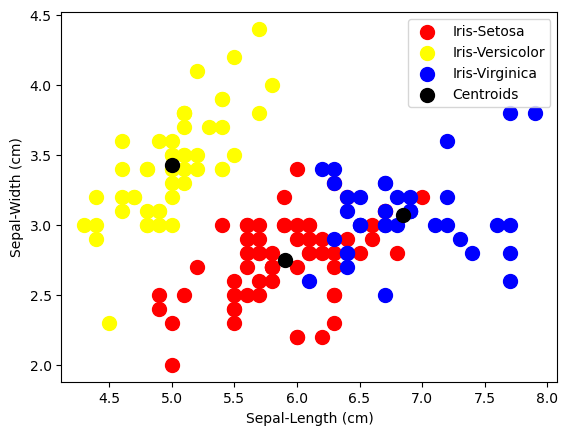

In [29]:
# Visualise the clusters on the first 2 columns
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c = 'red', label= 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'yellow', label= 'Iris-Versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = 'blue', label= 'Iris-Virginica')

#Plot the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='black', label = 'Centroids')
plt.xlabel('Sepal-Length (cm)')
plt.ylabel('Sepal-Width (cm)')
plt.legend()
plt.show()